# DSCI 100 Group Project - Predicting Housing Prices - Group Project Proposal
### Group Members: David Chen, Catherine Jiang, Chanon Mallikamas, Christopher Xu



### Introduction 
With the housing market being such a large share of the GDP, changes in the price and consumer outlook on the housing market can sway an economy. Hence, having the tools to accurately predict such a significant aspect of the economy can be highly beneficial. For a specific house, it is important for sellers to determine an adequate price to maximize their profit. 
Additionally, by identifying the price range of a house, it allows buyers to gauge the competitiveness of a house on the market and its long-term value. Therefore, this dataset exhibits valuable information and real-life applications. Using this predictive question, we can take a representative data set for the whole real estate population and infer characteristics of the whole population.



### Question: Can we use the data of past housing prices to predict the price of a new house?

Dataset: https://www.kaggle.com/datasets/yasserh/housing-prices-dataset

The dataset that we are using in our project is called Housing Prices Dataset, which is taken from houses that were previously sold. The information provided in this dataset includes numerical factors such as: 
price 
area (square feet)
bedrooms
bathrooms
stories 
Categorical factors such as:
mainstreet location
existence of a basement/guesthouse


Preliminary exploratory data analysis:

In [1]:
### Run this cell before continuing. (From worksheet_viz)
# The libraries used may need to be installed before you can run the jupyter notebook
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

In [2]:
# - Demonstrate that the dataset can be read from the web into R 

# We have read the data from the 
url = "https://raw.githubusercontent.com/chrisxu8383/dsci100_group_project/main/data/housingdata.csv"
housing_data = read.csv(url) 


# Here we see that the data follows the conditions of being tidy.
housing_data

price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>
13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [3]:
# Check for missing data

print("Positions of missing values by column") 
sapply(housing_data, function(x) which(is.na(x))) 
# There does not seem to be any missing data in the dataframe

[1] "Positions of missing values by column"


$price
integer(0)

$area
integer(0)

$bedrooms
integer(0)

$bathrooms
integer(0)

$stories
integer(0)

$mainroad
integer(0)

$guestroom
integer(0)

$basement
integer(0)

$hotwaterheating
integer(0)

$airconditioning
integer(0)

$parking
integer(0)

$prefarea
integer(0)

$furnishingstatus
integer(0)

In [4]:
# - Clean and wrangle your data into a tidy format

# When we load the data with read_csv, we observed that the data is in a tify format, however, sice we want 
# all of the categories to be usable with our model, we will convert the categorical features into numerical 
# featues so that the model will be able to interpret them 

# To make the categorical variables useable with our model, we will convert them into numerical values
# Here, the yes/no values are changed so that yes = 1 and no = 0
housing_data <- housing_data |>
    mutate(mainroad = ifelse(mainroad == "yes", 1, 0)) |>
    mutate(guestroom = ifelse(guestroom == "yes", 1, 0)) |>
    mutate(hotwaterheating = ifelse(hotwaterheating == "yes", 1, 0)) |>
    mutate(airconditioning = ifelse(airconditioning == "yes", 1, 0)) |>
    mutate(basement = ifelse(basement == "yes", 1, 0)) |>
    mutate(prefarea = ifelse(prefarea == "yes", 1, 0))

# ordinal encoding on furnishingstatus
# "unfurnished" = "0", "semi-furnished" = "1", "furnished" = "2"
housing_data$furnishingstatus <- recode_factor(housing_data$furnishingstatus, "unfurnished" = "0", "semi-furnished" = "1", "furnished" = "2") 
housing_data$furnishingstatus <- as.numeric(housing_data$furnishingstatus)

housing_data

price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
13300000,7420,4,2,3,1,0,0,0,1,2,1,3
12250000,8960,4,4,4,1,0,0,0,1,3,0,3
12250000,9960,3,2,2,1,0,1,0,0,2,1,2
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1750000,3620,2,1,1,1,0,0,0,0,0,0,1
1750000,2910,3,1,1,0,0,0,0,0,0,0,3
1750000,3850,3,1,2,1,0,0,0,0,0,0,1


In [5]:
# Split the data into training and test data
set.seed(42)
housing_split <- initial_split(housing_data, prop = 3/4, strata = price)  
housing_train <- training(housing_split)   
housing_test <- testing(housing_split)

In [6]:
# We decided to use a table that gave the mean of each of the features in our dataset.  
tbl_means <- housing_train |>
                summarise(across(area:furnishingstatus, mean))
print("Table of Mean values of each category")
tbl_means

# From this table, we can get the means of each of the features. For the binary features, we can get an 
# approximation of how many instances of yes we have for each of them

[1] "Table of Mean values of each category"


area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5219.138,2.931204,1.277641,1.749386,0.8624079,0.1793612,0.3660934,0.04176904,0.3169533,0.6707617,0.2604423,1.965602


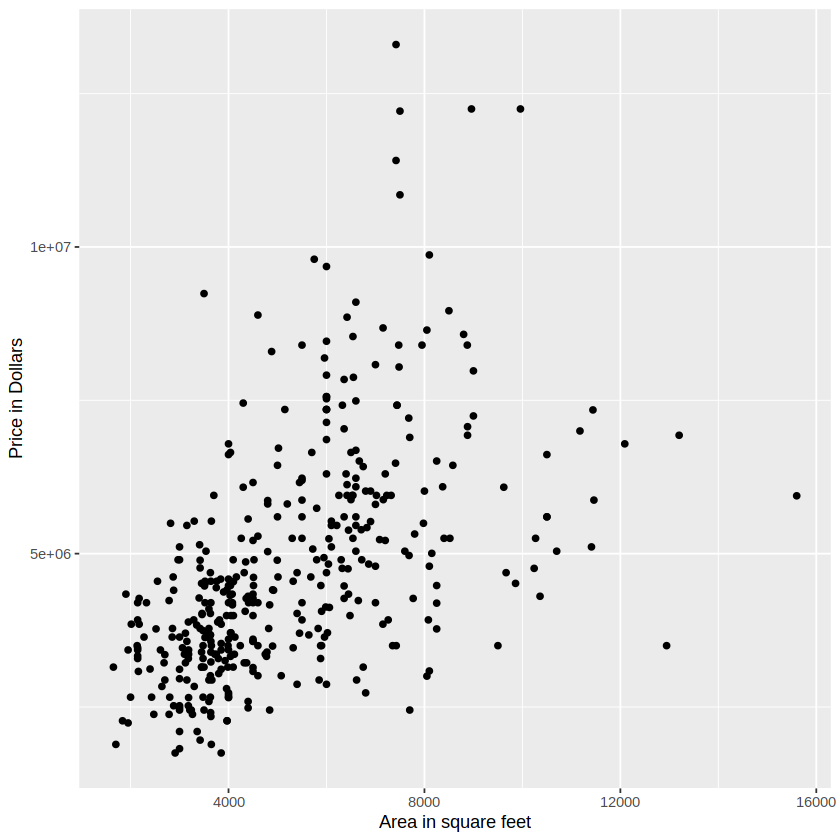

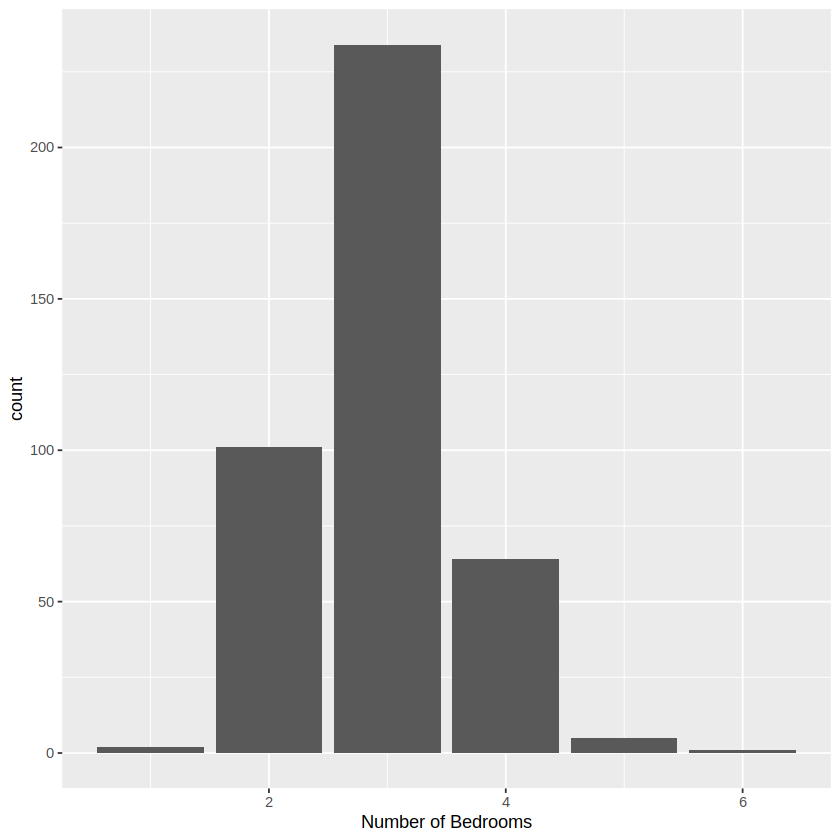

In [7]:
# We decided to use scatterplots and bar plots to visualize the relationship between the more relevant features 
# Scatterplots for area, bedrooms and prefarea

area_plot <- ggplot(housing_train, aes(x = area, y = price)) + 
                geom_point() + 
                labs(x="Area in square feet", y="Price in Dollars")
area_plot

bedrooms_plot <- ggplot(housing_train, aes(x = bedrooms)) + 
                geom_bar() + 
                labs(x="Number of Bedrooms")
bedrooms_plot


# !!! THIS TAKES A VERY LONG TIME TO RUN
# This will be a useful visualization if we can use this with just the more relevant features
# options(repr.plot.width = 10, repr.plot.height = 10)
# housing_pairplot <- housing_train |> 
#     ggpairs(
#         lower = list(continuous = wrap('points', alpha = 0.4)),
#         diag = list(continuous = "barDiag")
#     ) +
#     theme(text = element_text(size = 20))
# housing_pairplot



### Methods:  
We plan to use a Linear Regression Model and KNN regression model to make our predictions. We will average the results of both models to get a more robust prediction that is less prone to overfitting, or fitting to or noise in the training data. We will first assume equal importance for all variables and at later stages, we will put a greater emphasis on the the more relevant factors.

The features that we found to be most important are the area, number of bedrooms, number of bathrooms, prefarea (whether the house is in a preferable area) and the furnishing status, so we will be more likely to place more importance on features and use them in our model. To prevent our model from placing too much importance on one specific feature, we will be standardizing the numeric features such that each of the factors that we use will have an equal weighting for the model. We will also be carrying out cross-validation in order to have a robust assessment of our model and avoid overfitting the models we use


# Linear regression Analysis to predict price
Here, we will be trying a Linear regression model to predict pricing on our housing data. We start by specifying a model and fitting 

In [8]:
# Specify a Linear Regression Model and recipe
lm_spec = linear_reg() |>
            set_engine("lm") |>
            set_mode("regression")

# TODO: Change once features are selected
housing_recipe <- recipe(price ~ ., data=housing_train)
print(lm_spec)
print(housing_recipe)

Linear Regression Model Specification (regression)

Computational engine: lm 

Recipe

Inputs:

      role #variables
   outcome          1
 predictor         12


In [9]:
# fit the model to our training data
housing_fit <- workflow() |>
            add_recipe(housing_recipe) |>
            add_model(lm_spec) |>
            fit(data=housing_train)
housing_fit
# TODO: Give an equation after features are selected

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
     (Intercept)              area          bedrooms         bathrooms  
       -453242.1             237.5           89993.8         1102431.9  
         stories          mainroad         guestroom          basement  
        429940.5          312969.8          379087.6          311085.7  
 hotwaterheating   airconditioning           parking          prefarea  
        646005.3          914563.5          284707.6          655881.0  
furnishingstatus  
        216287.8  


In [10]:
# Calculate the model's RMSE to assess goodness of fit
housing_preds <- housing_fit |>
  predict(housing_train) |>
  bind_cols(housing_train)

lm_rmse <- housing_preds |>
            metrics(truth = price, estimate = .pred) |>
            filter(.metric == "rmse") |>
            select(.estimate) |>
            pull()
lm_rmse

[1] 1050452

In [11]:
# Calculate the model's RMSPE on the test data
housing_test_preds <- housing_fit |>
        predict(housing_test) |>
        bind_cols(housing_test)

lm_rmspe <- housing_test_preds |>
        metrics(truth = price, estimate = .pred) |>
        filter(.metric == "rmse") |>
        select(.estimate) |>
        pull()
lm_rmspe

[1] 1091084

NOTE: The RSME/RSMPE are ~$1m. This is likely because our prices range from 1.75m to 13m.

Using K-NN Regression to Predict Price

In [12]:
install.packages("kknn")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [13]:
housing_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> 
       set_engine("kknn") |>
       set_mode("regression") 

housing_recipe <- recipe(price ~ ., data = housing_train) |>
       step_scale(all_predictors()) |>
       step_center(all_predictors())
housing_recipe

housing_vfold <- vfold_cv(housing_train, v = 5, strata = price)

housing_workflow <- workflow() |>
  add_recipe(housing_recipe) |>
  add_model(housing_spec)
housing_workflow

Recipe

Inputs:

      role #variables
   outcome          1
 predictor         12

Operations:

Scaling for all_predictors()
Centering for all_predictors()

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


Determining the number neighbours to use in the regression

To find this, we must perform cross-validation to find the amount of neighbors with the lowest root mean squared prediction error (RMSPE). This is important in K-NN regression to make sure that the regression does not overfit or underfit the data. In this case, we will test the best amount of neighbors from 1-50. 

In [14]:
gridvals <- tibble(neighbors = seq(from = 1, to = 50))

housing_results <- workflow() |>
  add_recipe(housing_recipe) |>
  add_model(housing_spec) |>
  tune_grid(housing_vfold, grid = gridvals) |>
  collect_metrics() |>
  filter(.metric == "rmse") 

housing_min <- housing_results |>
    slice_min(mean, n=1)
housing_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
5,rmse,standard,1158832,5,50918.53,Preprocessor1_Model05


After this step, we will proceed with using 5 neighbors in our regression.

In [15]:
kmin <- housing_min |> pull(neighbors)

housing_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = kmin) |>
  set_engine("kknn") |>
  set_mode("regression")

housing_fit <- workflow() |>
  add_recipe(housing_recipe) |>
  add_model(housing_spec) |>
  fit(data = housing_train)

housing_summary <- housing_fit |>
  predict(housing_test) |>
  bind_cols(housing_test) |>
  metrics(truth = price, estimate = .pred) |>
  filter(.metric == 'rmse')

housing_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,1219391


### Expected outcomes and significance: - 
Some of our expected outcomes include the following:
- We might see varying relationships between price and some of the other features such as area, bedrooms or stories 
- The model may perform well on the training data, but it might have a lower performance on new data

### What impact could such findings have?
- Setting a price in the housing market according to the features of the house is extremely important. If we do not use regression analysis to set the price of the house, the house might not be sold if the price is too high or the house may be sold at a loss if the price is too low.

### What future questions could this lead to?
- How can we use this model/its predictions in other scenarios with added variables or new restrictions based on the targeted audience? 
- Can the regression model used in this study yield the same results in other markets?
